In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
def save_fig(name):
    path = f"images/{name}.png"
    plt.savefig(path,dpi=300,bbox_inches='tight')

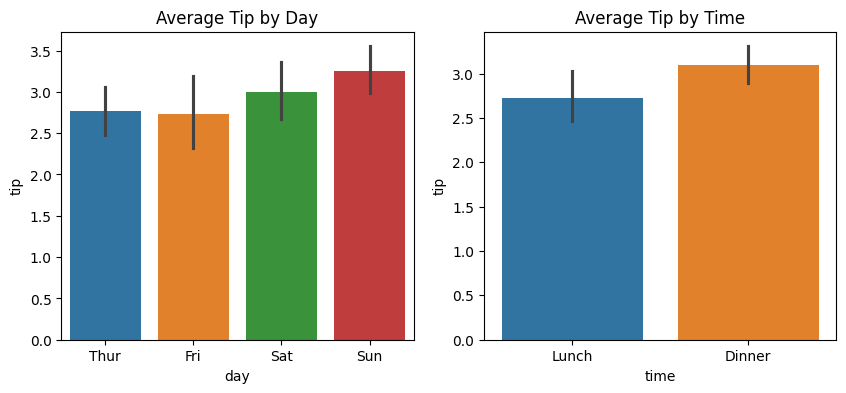

In [13]:
# Bar Plot for Average Tip by Day
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data = tips, x = 'day', y='tip', hue='day',legend=False,estimator='mean')
plt.title('Average Tip by Day')

plt.subplot(1,2,2)
sns.barplot(data=tips,x='time',y='tip',hue='time',legend=False)
plt.title('Average Tip by Time')

save_fig('tips_tip_per_day')
plt.show()

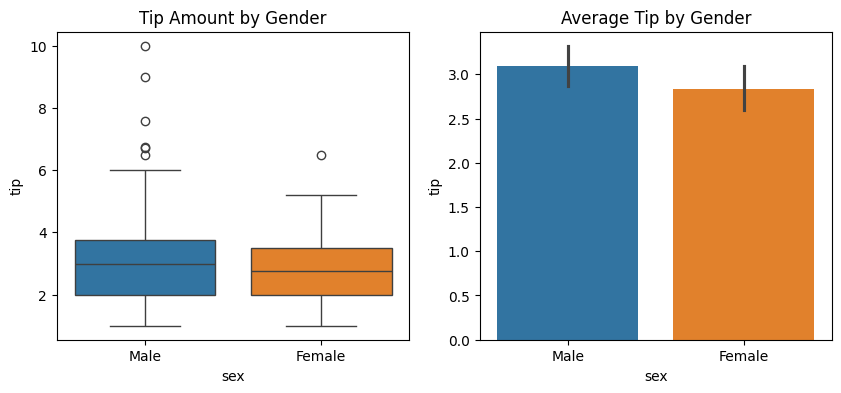

In [16]:
# Box Plot for Tip by Gender
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data=tips, x = 'sex',y='tip',hue='sex',legend=False)
plt.title('Tip Amount by Gender')

plt.subplot(1,2,2)
sns.barplot(data=tips,x='sex',y = 'tip',hue='sex',legend=False,estimator='mean')
plt.title('Average Tip by Gender')

save_fig('tips_tip_by_gender')
plt.show()

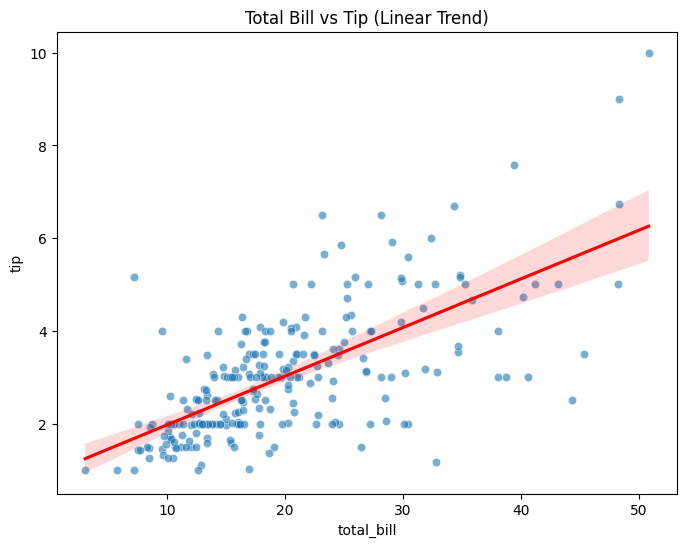

In [21]:
# Scatterplot and Regression Line for Relationship b/w Total Bill and Tip
plt.figure(figsize=(8,6))
sns.scatterplot(tips,x='total_bill',y='tip',alpha=0.6)
sns.regplot(data=tips,x='total_bill',y='tip',scatter=False,color='red')
plt.title('Total Bill vs Tip (Linear Trend)')
save_fig('tips_total_bill_vs_tip')
plt.show()

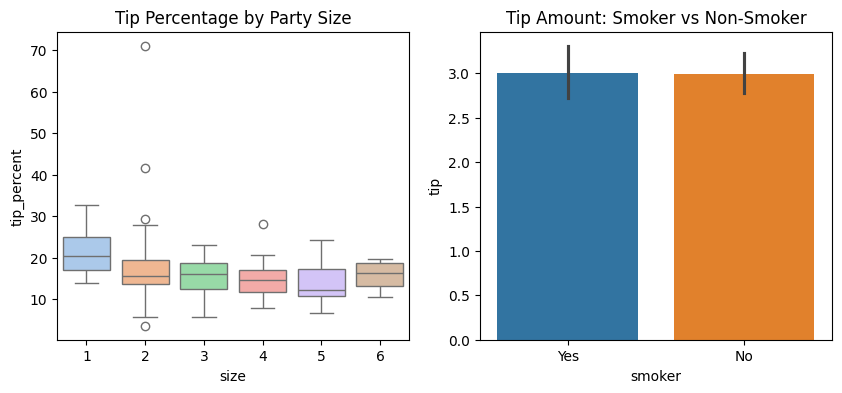

In [30]:
# Influence of Party Size on the Tip Percentage
tips['tip_percent'] = (tips['tip']/tips['total_bill'])*100
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data=tips,x='size',y='tip_percent',hue='size',legend=False,palette='pastel')
plt.title('Tip Percentage by Party Size')

plt.subplot(1,2,2)
sns.barplot(data=tips,x='smoker',y='tip',hue='smoker')
plt.title('Tip Amount: Smoker vs Non-Smoker')

save_fig('tips_perc_by_size_and_smoker')
plt.show()

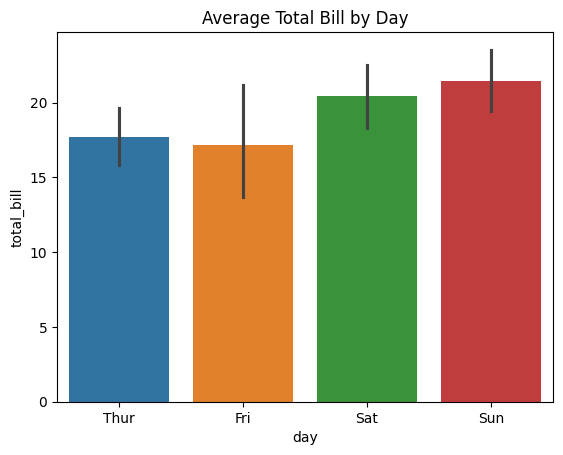

In [25]:
# Bar Plot for Avg Total Bill per Day
sns.barplot(data=tips, x = 'day', y='total_bill',estimator='mean',hue='day')
plt.title('Average Total Bill by Day')
save_fig('tips_avg_total_bill_by_day')
plt.show()

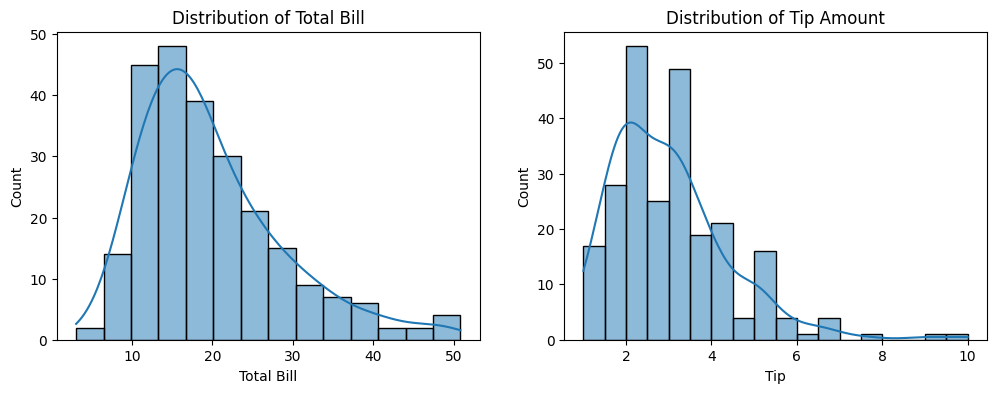

In [32]:
# Distribution plots by Histogram with kde for Total Bill
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(tips['total_bill'],kde= True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')

plt.subplot(1,2,2)
sns.histplot(tips['tip'],kde= True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip')
save_fig('tips_total_bill_distribution')
plt.show()

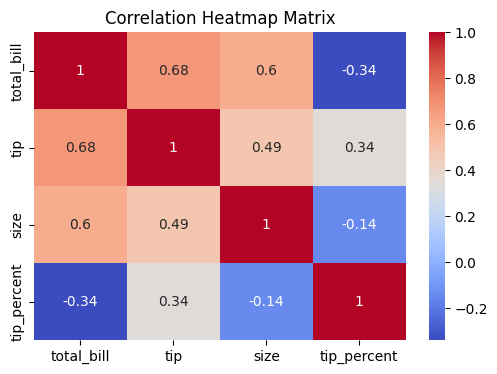

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(tips.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap Matrix')
save_fig('tips_heatmap_matrix')
plt.show()